# Project: No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
The main qeustion to answer here is why 30% of patients miss their scheduled appointment. We are trying to Analyse the most important reasons that affect the atendance of the patient.
    

### Questions for Analysis

    Does the gender of the patient has a realation with the absence?
    Does the age of the patient has a realation with the absence?
    Does the neighborhood of the patient has a realation with the absence?
    Does the scholarship affect the patient atendance?
    Does the disease type affect the patient atendance?
    Does receiving message affect the patient atendance?


In [1]:
#import the liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.


### General Properties


In [2]:
# Load data and print out a few lines.
df = pd.read_csv('/home/workspace/Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
df.duplicated().sum()

0

>No missing or duplicated data 

In [7]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning
 

>No need to patient id or appointment id for analysis, so we will drop them

In [9]:
# drop columns from dataset
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

# confirm changes
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


>Renaming columns

In [10]:
# rename 
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

# confirm changes
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


>check data and columns

In [11]:
df.gender.value_counts()

F    71840
M    38687
Name: gender, dtype: int64

In [12]:
df.age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: age, Length: 104, dtype: int64

In [13]:
#removing negative age
df = df[df['age'] >= 0]
df.age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
56     1635
38     1629
59     1624
2      1618
50     1613
57     1603
36     1580
51     1567
19     1545
39     1536
37     1533
54     1530
34     1526
33     1524
30     1521
6      1521
3      1513
17     1509
32     1505
5      1489
44     1487
18     1487
58     1469
46     1460
45     1453
       ... 
72      615
74      602
76      571
75      544
78      541
77      527
80      511
81      434
82      392
79      390
84      311
83      280
85      275
86      260
87      184
89      173
88      126
90      109
92       86
91       66
93       53
94       33
95       24
96       17
97       11
98        6
115       5
100       4
102       2
99        1
Name: age, Length: 103, dtype: int64

In [14]:
# change scheduled day and appointment day to datetime 
df['scheduledday'] = pd.to_datetime(df.scheduledday)
df['appointmentday'] = pd.to_datetime(df.appointmentday)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
gender            110526 non-null object
scheduledday      110526 non-null datetime64[ns]
appointmentday    110526 non-null datetime64[ns]
age               110526 non-null int64
neighbourhood     110526 non-null object
scholarship       110526 non-null int64
hipertension      110526 non-null int64
diabetes          110526 non-null int64
alcoholism        110526 non-null int64
handcap           110526 non-null int64
sms_received      110526 non-null int64
no_show           110526 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 11.0+ MB


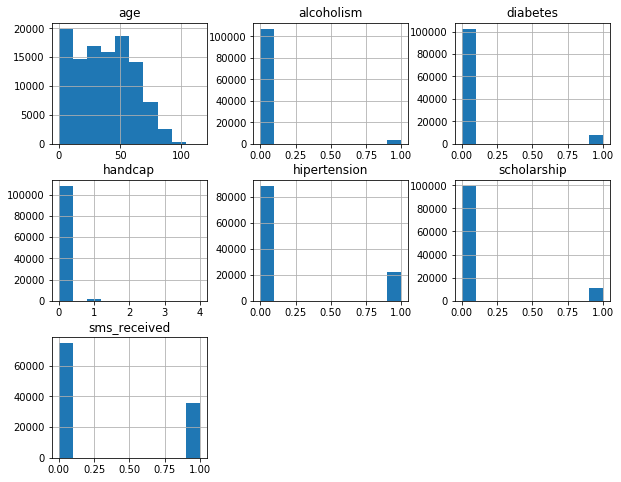

In [16]:
df.hist(figsize=(10,8));

<a id='eda'></a>
## Exploratory Data Analysis


### Does the gender of the patient has a realation with the absence?

In [17]:
df.groupby('gender').no_show.value_counts(normalize=True)

gender  no_show
F       No         0.796851
        Yes        0.203149
M       No         0.800321
        Yes        0.199679
Name: no_show, dtype: float64

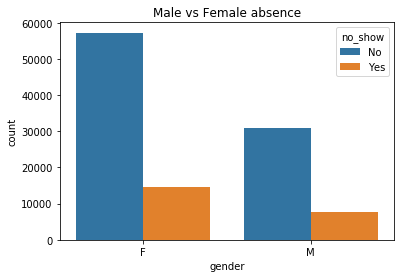

In [18]:
sns.countplot(x=df['gender'], hue=df['no_show']);
plt.title('Male vs Female absence');

>The number of females absence is greater than the males.

### Does the age of the patient has a realation with the absence?

In [19]:
df.groupby('age').no_show.value_counts(normalize=True)

age  no_show
0    No         0.819441
     Yes        0.180559
1    No         0.817422
     Yes        0.182578
2    No         0.844252
     Yes        0.155748
3    No         0.816920
     Yes        0.183080
4    No         0.782910
     Yes        0.217090
5    No         0.785091
     Yes        0.214909
6    No         0.792242
     Yes        0.207758
7    No         0.789068
     Yes        0.210932
8    No         0.776685
     Yes        0.223315
9    No         0.734694
     Yes        0.265306
10   No         0.761381
     Yes        0.238619
11   No         0.793305
     Yes        0.206695
12   No         0.750916
     Yes        0.249084
13   No         0.725295
     Yes        0.274705
14   No         0.717352
     Yes        0.282648
                  ...   
86   Yes        0.161538
87   No         0.853261
     Yes        0.146739
88   No         0.904762
     Yes        0.095238
89   No         0.832370
     Yes        0.167630
90   No         0.788991
     Yes    

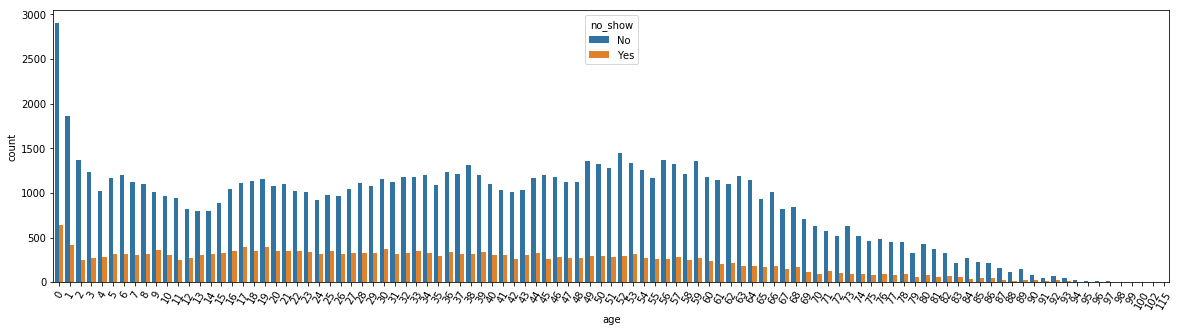

In [20]:
plt.figure(figsize=(20,5))
sns.countplot(x=df['age'], hue=df['no_show']);
plt.xticks(rotation=60);

>Old people don't show up to appointmens more than young people.

### Does the neighborhood of the patient has a realation with the absence?

In [21]:
df.groupby('neighbourhood').no_show.value_counts(normalize=True)

neighbourhood        no_show
AEROPORTO            No         0.875000
                     Yes        0.125000
ANDORINHAS           No         0.769673
                     Yes        0.230327
ANTÔNIO HONÓRIO      No         0.815498
                     Yes        0.184502
ARIOVALDO FAVALESSA  No         0.780142
                     Yes        0.219858
BARRO VERMELHO       No         0.784870
                     Yes        0.215130
BELA VISTA           No         0.798637
                     Yes        0.201363
BENTO FERREIRA       No         0.775058
                     Yes        0.224942
BOA VISTA            No         0.814103
                     Yes        0.185897
BONFIM               No         0.801659
                     Yes        0.198341
CARATOÍRA            No         0.769591
                     Yes        0.230409
CENTRO               No         0.789142
                     Yes        0.210858
COMDUSA              No         0.819355
                     Yes    

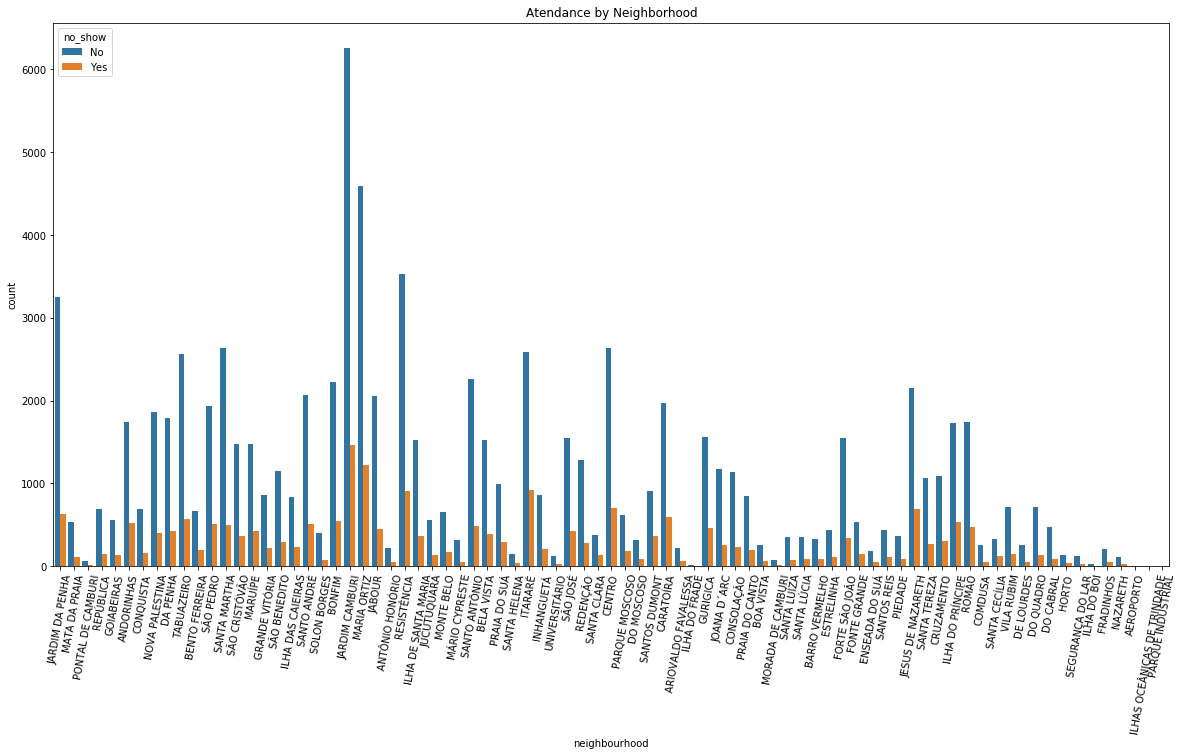

In [22]:
plt.figure(figsize=(20,10))
sns.countplot(x=df.neighbourhood, hue=df['no_show']);
plt.title('Atendance by Neighborhood')
plt.xticks(rotation=80);

>Some neighborhood have more people absent for their appointment than others.

### Does the scholarship affect the patient atendance?

In [23]:
df.groupby('scholarship').no_show.value_counts(normalize=True)

scholarship  no_show
0            No         0.801926
             Yes        0.198074
1            No         0.762637
             Yes        0.237363
Name: no_show, dtype: float64

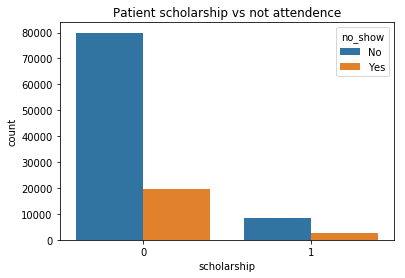

In [24]:
sns.countplot(x=df['scholarship'], hue=df['no_show']);
plt.title('Patient scholarship vs not attendence');

>Group whith scholearship have more absent patients

### Does the disease type affect the patient atendance?

In [25]:
df.groupby('hipertension').no_show.value_counts(normalize=True)

hipertension  no_show
0             No         0.790961
              Yes        0.209039
1             No         0.826980
              Yes        0.173020
Name: no_show, dtype: float64

In [26]:
df.groupby('diabetes').no_show.value_counts(normalize=True)

diabetes  no_show
0         No         0.796370
          Yes        0.203630
1         No         0.819967
          Yes        0.180033
Name: no_show, dtype: float64

In [27]:
df.groupby('alcoholism').no_show.value_counts(normalize=True)

alcoholism  no_show
0           No         0.798052
            Yes        0.201948
1           No         0.798512
            Yes        0.201488
Name: no_show, dtype: float64

In [28]:
df.groupby('handcap').no_show.value_counts(normalize=True)

handcap  no_show
0        No         0.797645
         Yes        0.202355
1        No         0.820764
         Yes        0.179236
2        No         0.797814
         Yes        0.202186
3        No         0.769231
         Yes        0.230769
4        No         0.666667
         Yes        0.333333
Name: no_show, dtype: float64

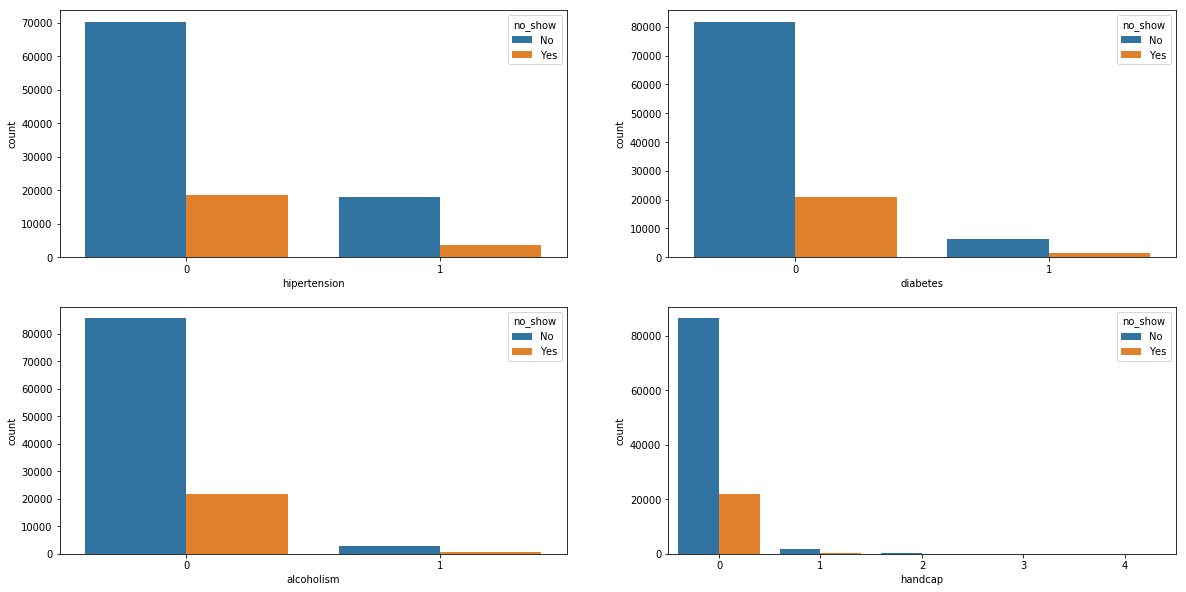

In [31]:
plt.figure(figsize=(20,10));
plt.subplot(2,2,1)
sns.countplot(df['hipertension'],hue=df['no_show'])
plt.subplot(2,2,2)
sns.countplot(df['diabetes'],hue=df['no_show'])
plt.subplot(2,2,3)
sns.countplot(df['alcoholism'],hue=df['no_show'])
plt.subplot(2,2,4)
sns.countplot(df['handcap'],hue=df['no_show']);

>Patients with diseases have less absents people.

### Does receiving message affect the patient atendance?

In [29]:
df.groupby('sms_received').no_show.value_counts(normalize=True)

sms_received  no_show
0             No         0.832965
              Yes        0.167035
1             No         0.724255
              Yes        0.275745
Name: no_show, dtype: float64

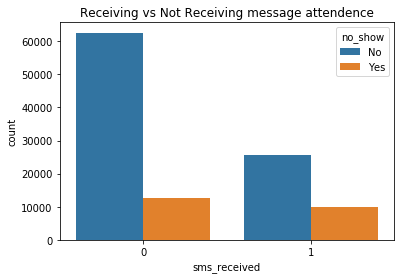

In [30]:
sns.countplot(x=df['sms_received'], hue=df['no_show']);
plt.title('Receiving vs Not Receiving message attendence');

>The group received sms has less absent patients

<a id='conclusions'></a>
## Conclusions

> The gender factor affects the no-show-up as females have more absents than males.
The age factor affects the no-show-up as old patients have more absents than young patients.
The neighborhood factor affects the no-show-up as Some neighborhoods have more people absent for their appointment than others.
The gender factor affects the no-show-up as the group whith scholearship have more absent patients.
The diseases factor affects the no-show-up as the patient with diseases like hipertension, diabetes and handcap have less absents.
The sms-recieving factor affects the no-show-up as the group received sms has less absent patients.


### LImitations
>The reason for the appointment and the doctor specialization could help in making better analysis for the No-Show of a patient.


## Submitting your Project 


In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0